#Background information about this tutorial

This is the second part of my data selection and cleaning process. We have 5 different environmental variables from 2 different monitoring sites ([USDA SNOTEL MONITORING STATIONS BUTTE AND SLUMGULLION](https://www.nrcs.usda.gov/wps/portal/wcc/home/quicklinks/imap#version=158&elements=R&networks=!&states=AZ,CO,UT,WY&counties=!&hucs=&minElevation=&maxElevation=&elementSelectType=all&activeOnly=true&activeForecastPointsOnly=false&hucLabels=false&hucIdLabels=false&hucParameterLabels=false&stationLabels=name,id&overlays=&hucOverlays=az_8,co_8,ut_8,wy_8&basinOpacity=100&basinNoDataOpacity=100&basemapOpacity=100&maskOpacity=0&mode=data&openSections=dataElement,parameter,date,basin,options,elements,location,networks,baseMaps,overlays,labels&controlsOpen=true&popup=&popupMulti=&popupBasin=&base=esriNgwm&displayType=station&basinType=6&dataElement=WTEQ&depth=-8&parameter=PCTMED&frequency=DAILY&duration=I&customDuration=1&dayPart=E&monthPart=E&forecastPubDay=1&forecastExceedance=50&seqColor=1&divColor=3&scaleType=D&scaleMin=&scaleMax=&referencePeriodType=POR&referenceBegin=1981&referenceEnd=2020&minimumYears=20&hucAssociations=true&relativeDate=-1&lat=38.085&lon=-110.948&zoom=6.5)). We are trying to model Colorado River Discharge at a gauge by Diamond Creek, AZ ([USGS GAUGE No. 09404200](https://waterdata.usgs.gov/nwis/inventory?site_no=09404200)). We will select which station's data to use for our final model using the pearson's r correlation coefficient to see how these attributes correlate to one another and which station's data has the highest correlation to the Diamond Creek discharge rate. This dataset spans 15 years from 2006-2020. You can find the file of the dataset used below in the same github folder this notebook is in, named as "Model_Station_Selection_2.csv".

This notebook was developed in Google Collab by Mya Yazbek on 3/16/2022. 

#First steps

Import packages, mount google drive, add file path to variable, load and view data.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file = "/content/drive/MyDrive/CURRENT Work files/GBI/Research Project/New Report/data/Model_Station_Selection_2.csv"

In [ ]:
data = pd.read_csv(file)

In [ ]:
data.head()

,Date,Butte (380)\nSnow\nWater\nEquivalent\n(in)\nStart of Month Values,Butte (380)\nPrecipitation\nAccumulation\n(in)\nStart of Month Values,Butte (380)\nAir\nTemperature\nObserved\n(degF)\nStart of Month Values,Butte (380)\nSoil\nTemperature\nObserved -2in\n(degF)\nStart of Month Values,Butte (380)\nSoil\nMoisture\nPercent -2in\n(pct)\nStart of Month Values,Slumgullion (762)\nSnow\nWater\nEquivalent\n(in)\nStart of Month Values,Slumgullion (762)\nPrecipitation\nAccumulation\n(in)\nStart of Month Values,Slumgullion (762)\nAir\nTemperature\nObserved\n(degF)\nStart of Month Values,Slumgullion (762)\nSoil\nTemperature\nObserved -2in\n(degF)\nStart of Month Values,Slumgullion (762)\nSoil\nMoisture\nPercent -2in\n(pct)\nStart of Month Values,DC_Inflow
0,Jan 2006,8.0,10.1,29,33.0,19.8,5.7,6.2,21.0,52.0,0.0,"13,970"
1,Feb 2006,11.4,13.1,19,33.0,18.5,7.9,8.4,10.0,52.0,0.0,"15,450"
2,Mar 2006,13.0,14.4,34,33.0,18.5,9.5,10.0,24.0,48.0,0.0,"11,020"
3,Apr 2006,15.2,16.4,33,33.0,27.8,13.4,13.4,23.0,41.0,0.0,"11,100"
4,May 2006,7.0,17.9,33,42.0,21.1,12.1,15.5,27.0,35.0,0.0,"10,630"


#Cleaning up your dataset


Lets look at our dataset to see what we could possibly fix to make it easier to work with. Uniformity and simplicity are key!

In [ ]:
data.head()

,Date,Butte (380)\nSnow\nWater\nEquivalent\n(in)\nStart of Month Values,Butte (380)\nPrecipitation\nAccumulation\n(in)\nStart of Month Values,Butte (380)\nAir\nTemperature\nObserved\n(degF)\nStart of Month Values,Butte (380)\nSoil\nTemperature\nObserved -2in\n(degF)\nStart of Month Values,Butte (380)\nSoil\nMoisture\nPercent -2in\n(pct)\nStart of Month Values,Slumgullion (762)\nSnow\nWater\nEquivalent\n(in)\nStart of Month Values,Slumgullion (762)\nPrecipitation\nAccumulation\n(in)\nStart of Month Values,Slumgullion (762)\nAir\nTemperature\nObserved\n(degF)\nStart of Month Values,Slumgullion (762)\nSoil\nTemperature\nObserved -2in\n(degF)\nStart of Month Values,Slumgullion (762)\nSoil\nMoisture\nPercent -2in\n(pct)\nStart of Month Values,DC_Inflow
0,Jan 2006,8.0,10.1,29,33.0,19.8,5.7,6.2,21.0,52.0,0.0,"13,970"
1,Feb 2006,11.4,13.1,19,33.0,18.5,7.9,8.4,10.0,52.0,0.0,"15,450"
2,Mar 2006,13.0,14.4,34,33.0,18.5,9.5,10.0,24.0,48.0,0.0,"11,020"
3,Apr 2006,15.2,16.4,33,33.0,27.8,13.4,13.4,23.0,41.0,0.0,"11,100"
4,May 2006,7.0,17.9,33,42.0,21.1,12.1,15.5,27.0,35.0,0.0,"10,630"


Off the bat we need to rename these chaotic column names. We should also drop the ',' from the DC_Inflow column (last column to the right).

Also filling null values (if any)

In [ ]:
data.fillna(method="ffill");

Renaming the columns of our dataset

In [ ]:
my_list = data.columns.values.tolist()

print(my_list)

['Date', 'Butte (380)\nSnow\nWater\nEquivalent\n(in)\nStart of Month Values', 'Butte (380)\nPrecipitation\nAccumulation\n(in)\nStart of Month Values', 'Butte (380)\nAir\nTemperature\nObserved\n(degF)\nStart of Month Values', 'Butte (380)\nSoil\nTemperature\nObserved -2in\n(degF)\nStart of Month Values', 'Butte (380)\nSoil\nMoisture\nPercent -2in\n(pct)\nStart of Month Values', 'Slumgullion (762)\nSnow\nWater\nEquivalent\n(in)\nStart of Month Values', 'Slumgullion (762)\nPrecipitation\nAccumulation\n(in)\nStart of Month Values', 'Slumgullion (762)\nAir\nTemperature\nObserved\n(degF)\nStart of Month Values', 'Slumgullion (762)\nSoil\nTemperature\nObserved -2in\n(degF)\nStart of Month Values', 'Slumgullion (762)\nSoil\nMoisture\nPercent -2in\n(pct)\nStart of Month Values', 'DC_Inflow']


In [ ]:
#Make a copy of your data before proceeding

In [ ]:
data2 = data.copy()

In [ ]:
data2.replace(',','', regex=True, inplace=True)

Drop ',' from the DC_Inflow column in our data

In [ ]:
data2["DC_Inflow"] = pd.to_numeric(data2["DC_Inflow"], downcast="float")

Making our DC_Inflow column an int data type instead of a string. Prior data processing has shown us that if there is a comma with your numeric values they might be stored as a string and need converting. 

In [ ]:
#for loop to create new names for all variables

for col in data2.columns:
    data2.rename(columns={col:col.upper().replace(" ","_")},inplace=True) #replaces spaces with _
    data2.rename(columns={col:col.replace("\n", "")}, inplace=True) #removes \n from our column names


In [ ]:
for col in data2.columns:
    data2.rename(columns={col:col.replace("SNOWWATEREQUIVALENT(IN)", "SWE_IN")}, inplace=True)
    data2.rename(columns={col:col.replace("PRECIPITATIONACCUMULATION(IN)", "PA_IN")}, inplace=True)
    data2.rename(columns={col:col.replace("AIRTEMPERATUREOBSERVED(DEGF)", "ATO_DEGF")}, inplace=True)
    data2.rename(columns={col:col.replace("SOILTEMPERATUREOBSERVED_-2IN(DEGF)", "STO_2IN_DEGF")}, inplace=True)
    data2.rename(columns={col:col.replace("SOILMOISTUREPERCENT_-2IN(PCT)", "SMP_2IN_PCT")}, inplace=True)


In [ ]:
for col in data2.columns:    
    data2.rename(columns={col:col.replace("START_OF_MONTH_VALUES", "")}, inplace=True)

In [ ]:
for col in data2.columns:
    data2.rename(columns={col:col.replace("BUTTE_(380)", "BU_380_")}, inplace=True)

In [ ]:
for col in data2.columns:
    data2.rename(columns={col:col.replace("SLUMGULLION_(762)", "SLM_762_")}, inplace=True)
    data2.rename(columns={col:col.replace("DC_INFLOW", "CR_DC_D")}, inplace=True)

Let's make sure our columns are renamed to our liking

In [ ]:
my_list2 = data2.columns.values.tolist()

print(my_list2)

['DATE', 'BU_380_SWE_IN', 'BU_380_PA_IN', 'BU_380_ATO_DEGF', 'BU_380_STO_2IN_DEGF', 'BU_380_SMP_2IN_PCT', 'SLM_762_SWE_IN', 'SLM_762_PA_IN', 'SLM_762_ATO_DEGF', 'SLM_762_STO_2IN_DEGF', 'SLM_762_SMP_2IN_PCT', 'CR_DC_D']


Looks good! Let's start with our dataset summary and start on some simple stats

#Data Exploration

Graph your data

Starting off simple and building our way up to more complex data visualizations

In [ ]:
x_axis = data2["DATE"]
y_axis = data2["BU_380_SWE_IN"]


plt.plot(x_axis, y_axis)
plt.grid(True)
plt.title("Graph of Snow Water Equivalent at Butte observation site\n\n", size = 15)
plt.suptitle("From 2006-2020")
plt.xlabel("Date")
plt.ylabel("Snow Water Equivalent (in)\n")

positions = [0, 35, 71, 107, 143, 179]
pos_list = []

for num in positions:
  pos_list.append(x_axis.iloc[num])


#print(pos_list)
plt.xticks(ticks = positions, labels = pos_list, rotation = 'vertical');

NameError: ignored

Reprinting our list of attributes so I don't have to scroll back up and find it every 2 seconds

In [ ]:
print(my_list2)

['DATE', 'BU_380_SWE_IN', 'BU_380_PA_IN', 'BU_380_ATO_DEGF', 'BU_380_STO_2IN_DEGF', 'BU_380_SMP_2IN_PCT', 'SLM_762_SWE_IN', 'SLM_762_PA_IN', 'SLM_762_ATO_DEGF', 'SLM_762_STO_2IN_DEGF', 'SLM_762_SMP_2IN_PCT', 'CR_DC_D']


In [ ]:
x = data2['DATE']
y1 = data2["BU_380_SWE_IN"]
y2 = data2["BU_380_PA_IN"]

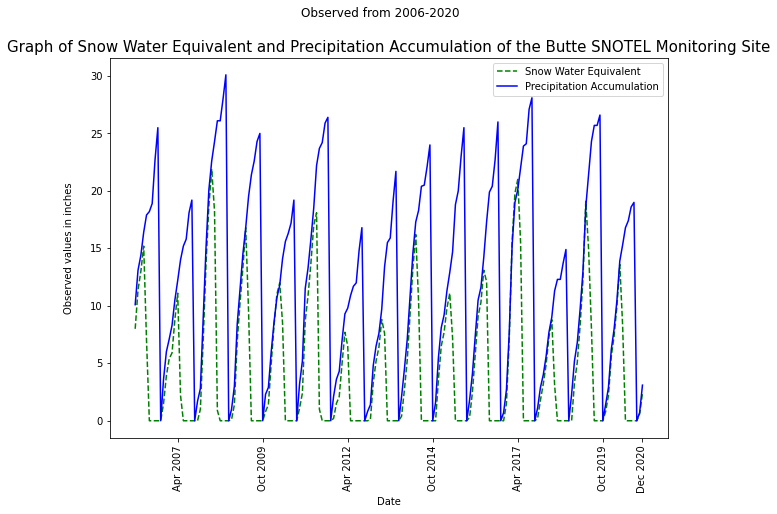

In [ ]:
plt.figure(figsize = (10, 7))

# Plot 1st line
plt.plot(x, y1, 'b', color = 'green', linestyle= 'dashed', label = "Snow Water Equivalent")

# Plot 2nd line
plt.plot(x, y2, 'r', color = 'blue', label="Precipitation Accumulation")


plt.title("Graph of Snow Water Equivalent and Precipitation Accumulation of the Butte SNOTEL Monitoring Site", size = 15)
plt.suptitle("Observed from 2006-2020")
plt.xlabel("Date")
plt.ylabel("Observed values in inches\n")


positions = [15, 45, 75, 105, 135, 165, 179]
pos_list = []

for num in positions:
  pos_list.append(x_axis.iloc[num])

plt.legend()
#print(pos_list)
plt.xticks(ticks = positions, labels = pos_list, rotation = 'vertical');

In [ ]:
cor_matrix = data2.corr()

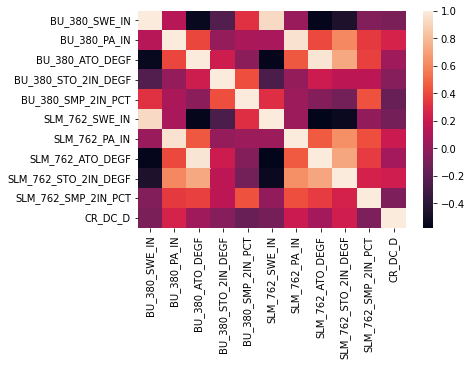

In [ ]:
sns.heatmap(cor_matrix)

In [ ]:
cor_matrix3 = cor_matrix["BU_380_PA_IN"].sort_values(ascending=False) 

print(cor_matrix3)

BU_380_PA_IN            1.000000
SLM_762_PA_IN           0.958769
SLM_762_STO_2IN_DEGF    0.605805
SLM_762_ATO_DEGF        0.400149
BU_380_ATO_DEGF         0.395541
SLM_762_SMP_2IN_PCT     0.348053
CR_DC_D                 0.256479
BU_380_SWE_IN           0.132002
BU_380_SMP_2IN_PCT      0.081262
SLM_762_SWE_IN          0.076112
BU_380_STO_2IN_DEGF     0.011890
Name: BU_380_PA_IN, dtype: float64


In [ ]:
cor_matrix2 = cor_matrix["CR_DC_D"].sort_values(ascending=False) 

print(cor_matrix2)

CR_DC_D                 1.000000
BU_380_PA_IN            0.256479
SLM_762_STO_2IN_DEGF    0.227456
SLM_762_PA_IN           0.208171
SLM_762_ATO_DEGF        0.064846
BU_380_ATO_DEGF         0.038356
BU_380_STO_2IN_DEGF    -0.046787
SLM_762_SMP_2IN_PCT    -0.073516
BU_380_SWE_IN          -0.081662
SLM_762_SWE_IN         -0.110057
BU_380_SMP_2IN_PCT     -0.154681
Name: CR_DC_D, dtype: float64


In [ ]:
final_data = data2[["BU_380_PA_IN", "SLM_762_STO_2IN_DEGF", "SLM_762_ATO_DEGF", "SLM_762_SWE_IN","BU_380_SMP_2IN_PCT"]].copy()

In [ ]:
final_cor = final_data.corr()

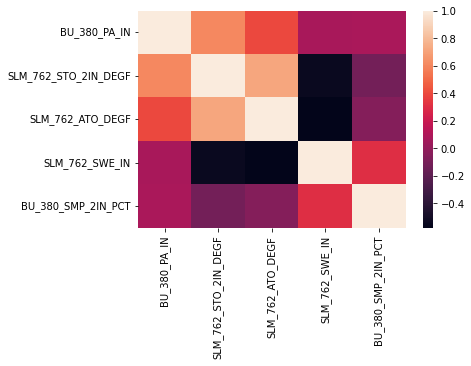

In [ ]:
sns.heatmap(final_cor)

This looks like a much more normalized correlation map compared to the first. We will now save our data to a csv so we can eventually add it to the final dataset. 

In [ ]:
final_data.head()

,BU_380_PA_IN,SLM_762_STO_2IN_DEGF,SLM_762_ATO_DEGF,SLM_762_SWE_IN,BU_380_SMP_2IN_PCT
0,10.1,52.0,21.0,5.7,19.8
1,13.1,52.0,10.0,7.9,18.5
2,14.4,48.0,24.0,9.5,18.5
3,16.4,41.0,23.0,13.4,27.8
4,17.9,35.0,27.0,12.1,21.1


In [ ]:
final_data.to_csv('final_data_2.csv')
!cp final_data_2.csv "/content/drive/MyDrive/CURRENT Work files/GBI/Research Project/New Report/Model_Building"

The above code will save the csv in the google drive account that was mounted at the beginning of this tutorial. 